In [2]:
import numpy as np
import random as rd

In [3]:
def grille(n):
    a=np.zeros((n,n),dtype=int)
    k=1
    r=1
    for i in range(n):
        if i==k:
            for j in range(n):
                if j==r:
                    a[i,j]=1
    return a

In [4]:
grille(n)

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

In [5]:
M=grille(n)
M

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

In [6]:
N=np.zeros((n,n),dtype=int)

In [7]:
N

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [8]:
def deplacement(M, i, j):
    voisins = [(1,0),(-1,0),(0,1),(0,-1),(1,-1),(1,1),(-1,1),(-1,-1)]                # récupérer liste des voisins
    voisins = [v for v in voisins if M[v] == 0]
    rd.choice(voisins) # renvoie une des positions à laquelle il n'y a rien
    return 

In [9]:
deplacement(M,1,1)

In [10]:
def etat_incubation1(M, p1, p2, x, y, temps_incubation, dictio):
    assert M.shape[0] == M.shape[1]
    n = M.shape[0]
    
    resultat = M
    
    L = [(1,0),(-1,0),(0,1),(0,-1),(1,-1),(1,1),(-1,1),(-1,-1)]
    voisin_infecte = 0

    if M[x, y] == 2:  # i.e. personne rétablie
        resultat[x, y] = 2  # reste rétablie
    elif M[x, y] == 3:  # i.e personne décédée
        resultat[x, y] = 3  # reste décédée
    elif M[x, y] == 0:  # i.e. personne saine        
        for (dx, dy) in L:  # pour chaque voisin
            if x+dx < n and x+dx >= 0 and y+dy < n and y+dy >= 0:  # i.e. gestion des bords
                if M[x+dx, y+dy] == 1:  # i.e. voisin infecté
                    # if numpy.random.random() <= p2:
                        voisin_infecte += 1

         # Gérer l'infection de la personne.
    if voisin_infecte > 0:
         #r = 0  # initialisation du résultat
         #for k in range(0, voisin_infecte):  # pour chaque voisin infecté
            #x = np.random.binomial(1, p2)  # 1 si le voisin k m'infecte, 0 sinon
            #r = max(r, x)  # mis à jour du résultat
         #resultat[x, y] = r  # infecter la personne
        if np.random.random() <= p2:
            #print((x,y), "tombe malade")
            resultat[x,y] = 1

    # if resultat[1, 1] == 1:
    #     print("infecté")
    # else:
    #     print("non infecté")
    
    
   
    # Gérer l'incubation de la personne.
    if resultat[x, y] == 1 :  # i.e. infectée
        # Incrémente le compteur de tous les malades : dictio = dict()
        if (x, y) in dictio:
            #print((x, y))
            dictio[(x, y)] = dictio[(x, y)] + 1   # On entre en incubation 
        else:
            # Nouvel infecté : on le rajoute au dictionnaire
            dictio[(x, y)] = 1
        #print((x,y), dictio[(x,y)])
    
   
    # En incubation depuis "pas" tours : on devient soit rétabli soit décédé selon une propabilité  p1

    if (x, y) in dictio and dictio[(x, y)] >= temps_incubation:
        if np.random.random() <= p1:
            resultat[x, y] = 3  # décédé
        else:
            resultat[x, y] = 2  # rétabli
        dictio.pop((x, y))
        
    
    return resultat, dictio

In [89]:
d = {(1,1):1}
p1 = 0.4
n = 20
p2 = 0.1
M = grille(n)
temps_incubation = 7
max_itere = 100



In [90]:
M=grille(n)
M

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [91]:
def next_step_incubation(M,d):
    #d = {(1,1):1}
    #resultat=grille(n)
   # print(M)d = {(1,1):1}
    #print(d)
    for i in range(n):
        for j in range(n):
            M, d = etat_incubation1(M, p1, p2, i, j, temps_incubation, d)
             
            #print(M)
            #print(d)
    
    return M

In [92]:
next_step_incubation(M,{(1,1):1})

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [129]:
d = {(1,1):1}
p1 = 0.4
n = 20
p2 = 0.1
M = grille(n)
temps_incubation = 7
max_itere = 100

In [130]:
def simulation(max_itere, n):
    cpt=0
    M = grille(n)
    D= dict()
    D={(1,1):1}
    resultat=[] 
    resultat.append((M).copy())
    new_state=next_step_incubation(M,D)
    while(cpt<max_itere):
        resultat.append((new_state).copy())
        new_state= next_step_incubation(new_state,D)
        cpt = cpt+1
        
    return resultat

In [95]:
res1 = simulation(max_itere, n)
for x in res1:
    print(x)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 

[array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0

<IPython.core.display.Javascript object>


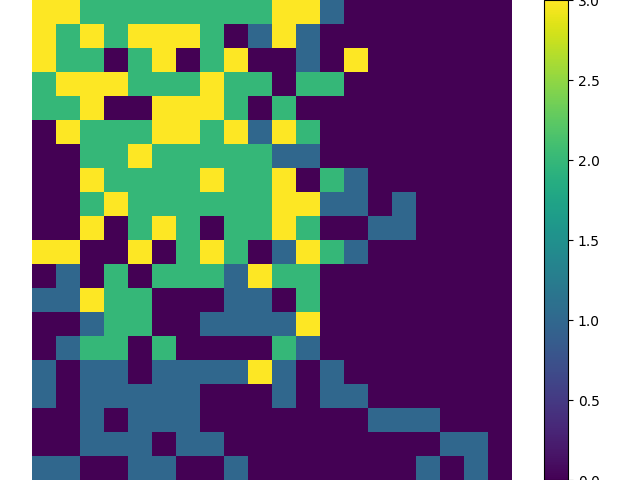

In [123]:
#https://stackoverflow.com/questions/15908371/matplotlib-colorbars-and-its-text-labels?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

%matplotlib notebook
from pylab import *



x=0
y=0


def simulation(max_itere):
    M=grille(n)
    cpt=0
    resultat=[M.copy()]
    new_state=next_step_incubation(M,d)
    
    while (cpt < max_itere):
        resultat.append(new_state.copy())
        new_state= next_step_incubation(new_state,d)
        cpt = cpt+1
    
    return resultat

resultat_final = simulation(max_itere)

print(resultat_final)


import matplotlib.pyplot as plt
size = np.array(M.shape)
dpi = 10.0 
figsize= size[1]/float(dpi),size[0]/float(dpi)
fig = plt.figure(facecolor = "white")
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon = False)
im=plt.imshow(M, interpolation = 'nearest', cmap ="viridis", vmin=0, vmax=3)
plt.xticks([]), plt.yticks([]) 
plt.colorbar()




import matplotlib.animation as animation

def update(i):
    #simulation_4param(max_itere=10)
    M = resultat_final[i]
    im.set_array(M)
    return im,

ani = animation.FuncAnimation(fig, update, frames=len(resultat_final), interval=500)
plt.show()